In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr

import env
import acquire
import wrangle

In [2]:
from math import sqrt
from scipy import stats

In [3]:
df = acquire.get_zillow_data()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2152863 entries, 0 to 2152862
Data columns (total 12 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   Unnamed: 0                    int64  
 1   parcelid                      int64  
 2   bedroomcnt                    float64
 3   bathroomcnt                   float64
 4   calculatedfinishedsquarefeet  float64
 5   taxvaluedollarcnt             float64
 6   yearbuilt                     float64
 7   taxamount                     float64
 8   fips                          float64
 9   assessmentyear                float64
 10  landtaxvaluedollarcnt         float64
 11  lotsizesquarefeet             float64
dtypes: float64(10), int64(2)
memory usage: 197.1 MB


In [5]:
df.isna().sum().sum() / len(df)

0.01705589254866659

In [6]:
df = wrangle.wrangle_zillow(df)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2118616 entries, 4 to 2152861
Data columns (total 13 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   parcelid               int64  
 2   bedrooms               float64
 3   bathrooms              float64
 4   square_feet            int64  
 5   value                  int64  
 6   year                   int64  
 7   tax                    float64
 8   fips                   int64  
 9   assessmentyear         float64
 10  landtaxvaluedollarcnt  float64
 11  lotsizesquarefeet      float64
 12  county                 object 
dtypes: float64(6), int64(6), object(1)
memory usage: 226.3+ MB


In [8]:
df.rename(columns={'landtaxvaluedollarcnt': 'land_value', 'lotsizesquarefeet': 'lot_square_feet'}, inplace=True) 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2118616 entries, 4 to 2152861
Data columns (total 13 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Unnamed: 0       int64  
 1   parcelid         int64  
 2   bedrooms         float64
 3   bathrooms        float64
 4   square_feet      int64  
 5   value            int64  
 6   year             int64  
 7   tax              float64
 8   fips             int64  
 9   assessmentyear   float64
 10  land_value       float64
 11  lot_square_feet  float64
 12  county           object 
dtypes: float64(6), int64(6), object(1)
memory usage: 226.3+ MB


### Hypotheses, Questions, what I want to explore-

    - bedrooms, bathrooms, and square feet- want to assess this relationship
    - is the pecrentage of tax to value consistent based on county?
    - is tax impacted by year built?
    - what zipcodes fall under what fips?
    - what is the relationship of zipcode to value?
    - is home square feet or lot square feet more correlated to value?
    - how much are home square footage and lot square footage correlated to eachother?
    - how is year built related to value?

In [9]:
df['zipcode'] = df['zipcode'].astype('int')

In [10]:
df.zipcode.value_counts().tail(30)

96322     483
97324     455
96151     451
399675    380
96323     340
97108     340
95993     301
96009     291
96207     289
96289     215
96434     206
96038     182
96226     175
95996     139
96039     102
95995      87
96148      46
96467      35
97092      34
97339      28
95998      20
97177      12
96002       9
97336       4
96859       2
96500       1
95991       1
96048       1
97088       1
95994       1
Name: zipcode, dtype: int64

In [46]:
train_and_validate, test = train_test_split(df, test_size=.2, random_state=123)
train, validate = train_test_split(train_and_validate, test_size=.3, random_state=123)

In [11]:
## Why is 399675 a zipcode?
## I don't see anything that jumps out other than all in LA

In [12]:
df[df.zipcode == 399675]

,Unnamed: 0,bedrooms,bathrooms,square_feet,value,year,tax,fips,assessmentyear,land_value,lot_square_feet,zipcode,county
7165,7165,4.0,4.0,4280,2724804,1980,37382.31,6037,2016.0,1623703.0,92746.0,399675,los_angeles
7166,7166,3.0,3.0,1987,208877,1981,2886.80,6037,2016.0,54036.0,23671.0,399675,los_angeles
7167,7167,3.0,2.0,1895,719700,1962,8945.78,6037,2016.0,478141.0,15772.0,399675,los_angeles
21235,21235,4.0,4.0,3568,613776,2006,7639.93,6037,2016.0,210022.0,28595.0,399675,los_angeles
28597,28597,3.0,2.0,2264,848586,1955,10261.75,6037,2016.0,566808.0,87400.0,399675,los_angeles
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2149192,2149192,4.0,3.0,3230,546982,1978,6898.67,6037,2016.0,176393.0,20050.0,399675,los_angeles
2149193,2149193,3.0,2.0,1352,685293,1954,8346.39,6037,2016.0,558387.0,7615.0,399675,los_angeles
2149194,2149194,3.0,2.0,1832,358930,1954,4542.88,6037,2016.0,144575.0,8259.0,399675,los_angeles
2149195,2149195,3.0,4.0,5158,1042677,1987,12826.38,6037,2016.0,561332.0,49560.0,399675,los_angeles


In [48]:
train['zipcode'].value_counts().groupby(df.fips == 6037).sum()

fips
False    979542
True     111411
Name: zipcode, dtype: int64

Text(0.5, 1.0, 'Zipcode Distribution for Los Angeles')

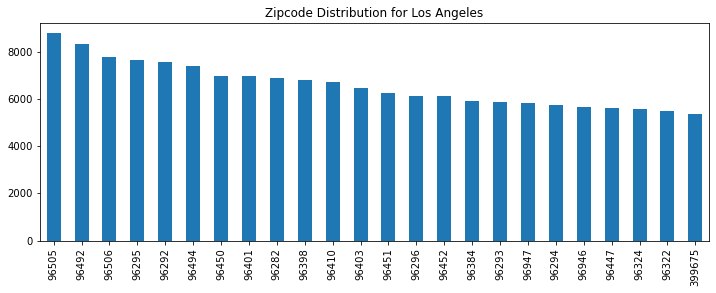

In [49]:
plt.figure(figsize=(12,4))
train['zipcode'].value_counts().groupby(train.fips == 6037).plot(kind='bar')
plt.title('Zipcode Distribution for Los Angeles')

Text(0.5, 1.0, 'Zipcode Distribution for Orange County')

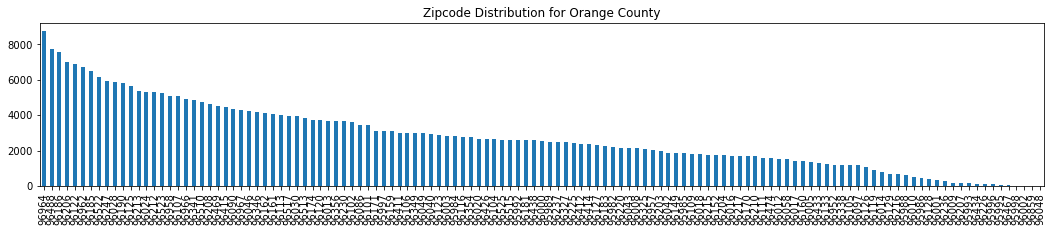

In [55]:
plt.figure(figsize=(18,3))
train['zipcode'].value_counts().groupby(train.fips == 6059).plot(kind='bar')
plt.title('Zipcode Distribution for Orange County')

Text(0.5, 1.0, 'Zipcode Distribution for Ventura County')

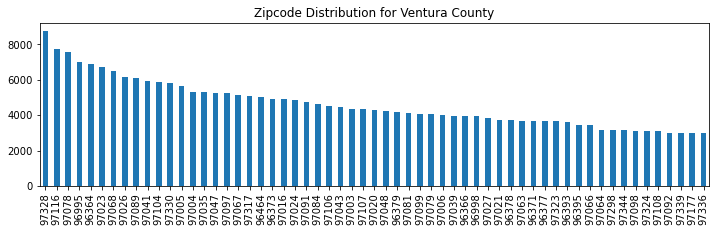

In [56]:
plt.figure(figsize=(12,3))
train['zipcode'].value_counts().groupby(train.fips == 6111).plot(kind='bar')
plt.title('Zipcode Distribution for Ventura County')

In [59]:
(train['value'].where(train.fips == 6111)).mean()

436805.7115742218

In [61]:
(train['value'].where(train.fips == 6059)).mean()

516157.1308810421

In [62]:
(train['value'].where(train.fips == 6037)).mean()

416132.97661612625

In [88]:
(train['tax'].where(train.fips == 6111)).mean()

4994.034866806749

In [89]:
(train['tax'].where(train.fips == 6059)).mean()

5962.64332783545

In [90]:
(train['tax'].where(train.fips == 6037)).mean()

5252.594423162487

<AxesSubplot:xlabel='value', ylabel='tax'>

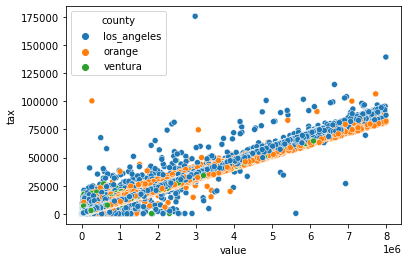

In [91]:
sns.scatterplot(x='value', y='tax', data=train, hue='county')

Takeaway- average tax is different per county

<AxesSubplot:xlabel='county', ylabel='value'>

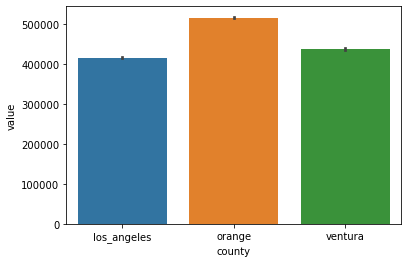

In [63]:
sns.barplot(x='county', y='value', data=train)

<AxesSubplot:xlabel='zipcode', ylabel='value'>

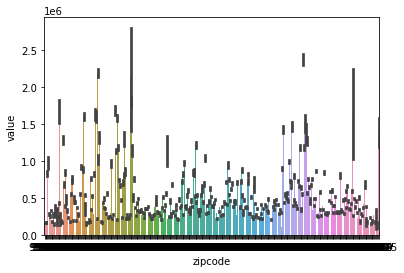

In [78]:
sns.barplot(x='zipcode', y='value', data=train)

<AxesSubplot:xlabel='assessmentyear', ylabel='value'>

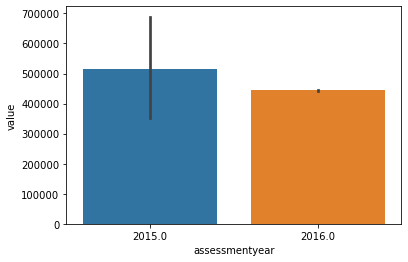

In [126]:
sns.barplot(x='assessmentyear', y='value', data =train)

In [127]:
train.assessmentyear.value_counts()

2016.0    1185665
2015.0         27
Name: assessmentyear, dtype: int64

<AxesSubplot:title={'center':'Feature Correlation to Tax Value'}>

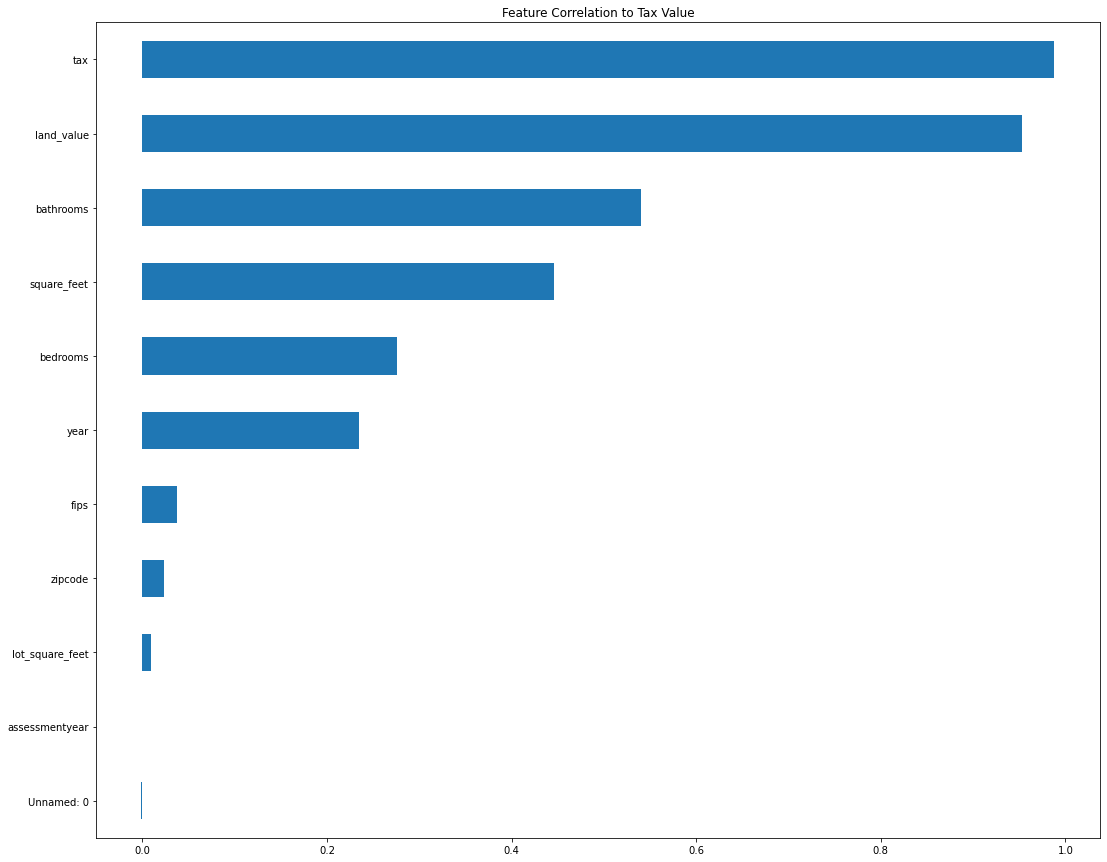

In [79]:
plt.figure(figsize=(18,15))
plt.title("Feature Correlation to Tax Value")
corr_chart = train.drop("value", axis=1).corrwith(train['value']).sort_values().plot.barh()
corr_chart

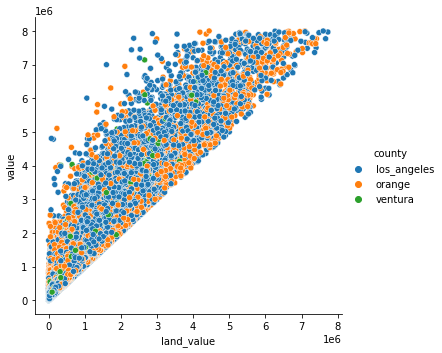

In [85]:
sns.relplot(x="land_value", y="value", data=train, hue='county')
plt.show()

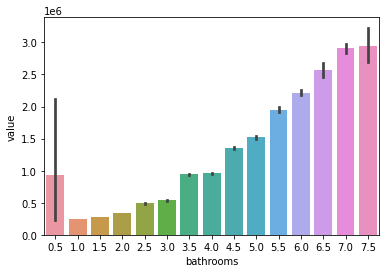

In [83]:
sns.barplot(x="bathrooms", y="value", data=train)
plt.show()

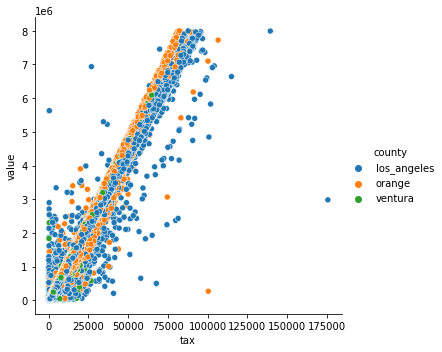

In [87]:
sns.relplot(x="tax", y="value", data=train, hue='county')
plt.show()

In [95]:
#train['zipcode'].value_counts().groupby(train.fips == 6111)

for value in train['zipcode']:
    print(train['zipcode'].values)

[96190 96212 96971 ... 96341 96514 97118]


AttributeError: 'NoneType' object has no attribute 'unique'

In [113]:
train.groupby(train.county).mean()

,Unnamed: 0,bedrooms,bathrooms,square_feet,value,year,tax,fips,assessmentyear,land_value,lot_square_feet,zipcode
county,,,,,,,,,,,,
los_angeles,1.075663e+06,3.193831,2.126859,1751.033422,416132.976616,1954.960914,5252.594423,6037.0,2015.999990,253955.529794,11286.124111,96411.474697
orange,1.079834e+06,3.496591,2.439648,2045.066870,516157.130881,1971.917654,5962.643328,6059.0,2015.999990,332996.461420,8618.700156,96920.752943
ventura,1.071895e+06,3.568137,2.394496,2005.448401,436805.711574,1973.965780,4994.034867,6111.0,2015.999824,222536.778143,12126.489696,96937.366691


In [122]:
np.quantile(train.value, .5)

327119.0

In [125]:
train.groupby(train.zipcode).aggregate('median').reset_index()

,zipcode,Unnamed: 0,bedrooms,bathrooms,square_feet,value,year,tax,fips,assessmentyear,land_value,lot_square_feet
0,95982,1092256.0,2.0,1.0,1025.0,164199.0,1925.0,2394.470,6037.0,2016.0,99067.0,5100.0
1,95983,1103074.0,3.0,1.0,1056.0,166172.0,1940.0,2356.400,6037.0,2016.0,88455.0,5043.0
2,95984,1102971.5,2.0,1.0,1040.0,166585.5,1924.0,2193.870,6037.0,2016.0,96980.5,5200.0
3,95985,1037773.0,3.0,2.0,2002.0,579580.0,1921.0,7132.850,6037.0,2016.0,399886.0,7024.0
4,95986,1091676.0,4.0,3.0,2852.0,722842.0,1922.0,8786.020,6037.0,2016.0,505968.0,7801.0
...,...,...,...,...,...,...,...,...,...,...,...,...
381,97331,1041394.5,3.0,2.0,1561.0,157518.0,1978.0,1877.885,6037.0,2016.0,34950.0,44957.0
382,97336,820863.5,3.5,2.0,1932.0,212722.0,1972.0,2719.040,6037.0,2016.0,54711.5,114402.5
383,97339,1046790.0,2.0,1.0,1267.0,118800.0,1961.0,1234.180,6037.0,2016.0,24486.0,149578.0
384,97344,1079061.0,3.0,2.0,1322.0,108525.5,1986.0,1466.425,6037.0,2016.0,22017.0,24504.0


In [132]:
train[train.assessmentyear == 2015]

,Unnamed: 0,bedrooms,bathrooms,square_feet,value,year,tax,fips,assessmentyear,land_value,lot_square_feet,zipcode,county
1831651,1831651,1.0,1.0,712,119519,1947,1395.70,6037,2015.0,72441.0,2999.0,96438,los_angeles
625034,625034,3.0,3.0,2126,389975,1980,4285.06,6111,2015.0,168824.0,2450.0,97106,ventura
87623,87623,1.0,1.0,722,42179,1952,463.58,6037,2015.0,25477.0,3000.0,96438,los_angeles
1572339,1572339,4.0,3.0,1938,542280,1979,5882.66,6111,2015.0,271140.0,9732.0,97089,ventura
430829,430829,2.0,1.0,904,153906,1926,1750.12,6111,2015.0,117390.0,11000.0,97113,ventura
1626371,1626371,4.0,3.0,2428,559608,1964,6130.14,6111,2015.0,322998.0,14435.0,97097,ventura
21490,21490,3.0,2.0,1510,418191,1946,4686.82,6111,2015.0,341693.0,2450.0,97106,ventura
2078569,2078569,2.0,1.0,807,90825,1925,1393.45,6037,2015.0,89438.0,9027.0,96414,los_angeles
1001417,1001417,3.0,2.5,2033,239922,2002,329.94,6059,2015.0,7586.0,2106.0,96181,orange
1410568,1410568,2.0,1.0,886,230780,1953,2803.10,6037,2015.0,216367.0,3243.0,96127,los_angeles


I think I should look at dropping assessment year 2015 as there are not many records, but the mean value is noteably different. There may have been different protcols to assess value. Perhaps something to research

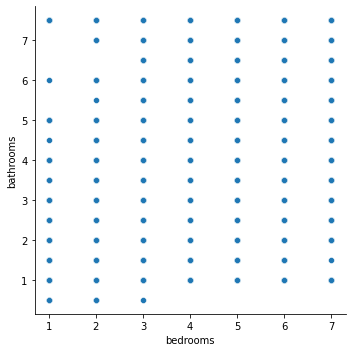

In [133]:
sns.relplot(x="bedrooms", y="bathrooms", data=train)

In [151]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1185692 entries, 361546 to 883520
Data columns (total 13 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Unnamed: 0       1185692 non-null  int64  
 1   bedrooms         1185692 non-null  float64
 2   bathrooms        1185692 non-null  float64
 3   square_feet      1185692 non-null  int64  
 4   value            1185692 non-null  int64  
 5   year             1185692 non-null  int64  
 6   tax              1185692 non-null  float64
 7   fips             1185692 non-null  int64  
 8   assessmentyear   1185692 non-null  float64
 9   land_value       1185692 non-null  float64
 10  lot_square_feet  1185692 non-null  float64
 11  zipcode          1185692 non-null  int64  
 12  county           1185692 non-null  object 
dtypes: float64(6), int64(6), object(1)
memory usage: 158.9+ MB


In [227]:
alpha = .05
r, p = stats.spearmanr(train.square_feet, train.lot_square_feet)
r, p

(0.3861976281089582, 0.0)

In [148]:
stats.spearmanr(train.value, train.lot_square_feet)

SpearmanrResult(correlation=0.17831355565243184, pvalue=0.0)

In [163]:
stats.spearmanr(train.value, train.square_feet)

SpearmanrResult(correlation=0.5177082983718946, pvalue=0.0)

In [150]:
stats.spearmanr(train.value, train.tax)

SpearmanrResult(correlation=0.9785797264086693, pvalue=0.0)

In [157]:
stats.spearmanr(train.value, train.land_value)

SpearmanrResult(correlation=0.9366693692314451, pvalue=0.0)

In [158]:
stats.spearmanr(train.bedrooms, train.bathrooms)

SpearmanrResult(correlation=0.6306982541928499, pvalue=0.0)

In [159]:
stats.spearmanr(train.bedrooms, train.square_feet)

SpearmanrResult(correlation=0.6527560096317669, pvalue=0.0)

In [160]:
stats.spearmanr(train.bathrooms, train.square_feet)

SpearmanrResult(correlation=0.825845169446195, pvalue=0.0)

In [164]:
stats.spearmanr(train.tax, train.land_value)

SpearmanrResult(correlation=0.9100159209031642, pvalue=0.0)

In [167]:
stats.spearmanr(train.lot_square_feet, train.land_value)

SpearmanrResult(correlation=0.09063139960148961, pvalue=0.0)

In [168]:
stats.spearmanr(train.year, train.land_value)

SpearmanrResult(correlation=0.10952511733401807, pvalue=0.0)

In [169]:
stats.spearmanr(train.year, train.value)

SpearmanrResult(correlation=0.2886060747696641, pvalue=0.0)

In [229]:
vv = train[train.county == 'ventura'].value
lav = train[train.county == 'los_angeles'].value
ov = train[train.county == 'orange'].value
diffv = train[train.county != 'ventura'].value
diffl = train[train.county != 'los_angeles'].value
diffo = train[train.county != 'orange'].value

In [176]:
vv.var(), lav.var(), ov.var()

(123256978915.7302, 242112788565.78442, 259172525130.062)

In [177]:
stats.kruskal(vv, lav, ov)

KruskalResult(statistic=32062.88925074271, pvalue=0.0)

In [178]:
stats.f_oneway(vv, lav, ov)

F_onewayResult(statistic=4667.782493510812, pvalue=0.0)

In [232]:
t, p = stats.ttest_ind(vv, diffv, equal_var=False)
t, p

(-5.888983961631111, 3.895772446190121e-09)

In [233]:
t, p = stats.ttest_ind(lav, diffl, equal_var=False)
t, p

(-87.16842408987222, 0.0)

In [234]:
t, p = stats.ttest_ind(ov, diffo, equal_var=False)
t, p

(93.1245998980196, 0.0)

In [235]:
train.county.value_counts()

los_angeles    787423
orange         307386
ventura         90883
Name: county, dtype: int64

In [236]:
vt = train[train.county == 'ventura'].tax
lat = train[train.county == 'los_angeles'].tax
ot = train[train.county == 'orange'].tax
diffvt = train[train.county != 'ventura'].tax
difflat = train[train.county != 'los_angeles'].tax
diffot = train[train.county != 'orange'].tax

In [239]:
t, p = stats.ttest_ind(vt, diffvt, equal_var=False)
t, p

(-32.61477689003073, 2.3649544326941885e-232)

In [240]:
t, p = stats.ttest_ind(lat, difflat, equal_var=False)
t, p

(-46.03534355795592, 0.0)

In [241]:
t, p = stats.ttest_ind(ot, diffot, equal_var=False)
t, p

(62.47352537124558, 0.0)

In [199]:
vv = train[train.county == 'ventura'].value
lav = train[train.county == 'los_angeles'].value
ov = train[train.county == 'orange'].value

In [200]:
vv.std(), lav.std(), ov.std()

(351079.7329891462, 492049.57937771315, 509089.8988686203)

In [201]:
vv.mean(), lav.mean(), ov.mean()

(436805.7115742218, 416132.97661612625, 516157.1308810421)

In [202]:
vv.min(), lav.min(), ov.min()

(4544, 722, 2842)

In [203]:
vv.max(), lav.max(), ov.max()

(7138171, 7996168, 7996713)

In [204]:
vt = train[train.county == 'ventura'].tax
lat = train[train.county == 'los_angeles'].tax
ot = train[train.county == 'orange'].tax

In [205]:
vt.std(), lat.std(), ot.std()

(3897.0476332802477, 5756.938087706728, 5639.581385757183)

In [206]:
vt.mean(), lat.mean(), ot.mean()

(4994.034866806749, 5252.594423162487, 5962.64332783545)

In [207]:
vt.min(), lat.min(), ot.min()

(34.6, 45.32, 18.72)

In [208]:
vt.max(), lat.max(), ot.max()

(75722.34, 175524.68, 106584.78)

In [212]:
train.groupby(train.county == 'ventura').mean()

,Unnamed: 0,bedrooms,bathrooms,square_feet,value,year,tax,fips,assessmentyear,land_value,lot_square_feet,zipcode
county,,,,,,,,,,,,
False,1.076834e+06,3.278836,2.214680,1833.588247,444216.436546,1959.721804,5451.952569,6043.176869,2015.999990,276147.597825,10537.200070,96554.463111
True,1.071895e+06,3.568137,2.394496,2005.448401,436805.711574,1973.965780,4994.034867,6111.000000,2015.999824,222536.778143,12126.489696,96937.366691


In [242]:
vl = train[train.county == 'ventura'].land_value
lal = train[train.county == 'los_angeles'].land_value
ol = train[train.county == 'orange'].land_value
notvl = train[train.county != 'ventura'].land_value
notlal = train[train.county != 'los_angeles'].land_value
notol = train[train.county != 'orange'].land_value
overall = train.land_value.mean()

In [243]:
t, p = stats.ttest_ind(vl, notvl, equal_var=False)
t, p

(-63.65717514460182, 0.0)

In [244]:
t, p = stats.ttest_ind(lal, notlal, equal_var=False)
t, p

(-78.77920210915244, 0.0)

In [245]:
t, p = stats.ttest_ind(ol, notol, equal_var=False)
t, p

(106.73515639562038, 0.0)

In [246]:
df.county.value_counts()

los_angeles    1407064
orange          548465
ventura         161780
Name: county, dtype: int64

In [261]:
train.groupby(train.county == 'ventura').mean()

,Unnamed: 0,bedrooms,bathrooms,square_feet,value,year,tax,fips,assessmentyear,land_value,lot_square_feet,zipcode
county,,,,,,,,,,,,
False,1.076834e+06,3.278836,2.214680,1833.588247,444216.436546,1959.721804,5451.952569,6043.176869,2015.999990,276147.597825,10537.200070,96554.463111
True,1.071895e+06,3.568137,2.394496,2005.448401,436805.711574,1973.965780,4994.034867,6111.000000,2015.999824,222536.778143,12126.489696,96937.366691


Text(0.5, 1.0, 'Zipcode Distribution for Ventura County')

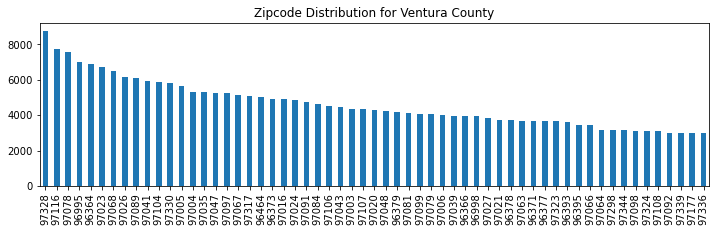

In [263]:
plt.figure(figsize=(12,3))
train['zipcode'].value_counts().groupby(train.county == 'ventura').plot(kind='bar')
plt.title('Zipcode Distribution for Ventura County')

<AxesSubplot:xlabel='zipcode', ylabel='value'>

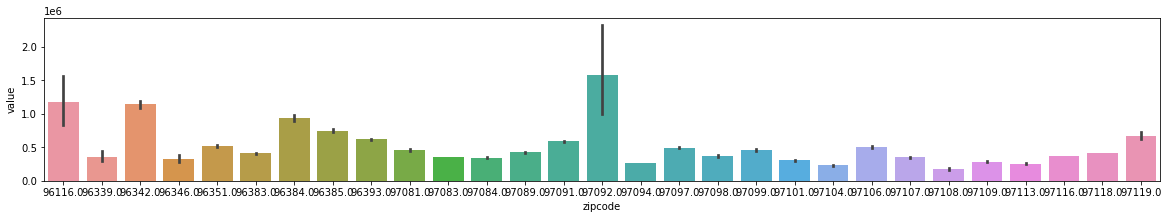

In [272]:
plt.figure(figsize=(20,3))
sns.barplot(x= train.zipcode.where(train.county == 'ventura') , y='value', data=train)

sns.swarmplot(x= train.zipcode.where(train.county == 'ventura') , y='value', data=train)

sns.stripplot(x= train.zipcode.where(train.county == 'ventura') , y='value', data=train)